<a href="https://colab.research.google.com/github/cicbeast/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-05-07 01:34:17--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                <=> ]  21.40M   873KB/s    in 25s     

2019-05-07 01:34:43 (862 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22444881]



In [2]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [3]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
# All our imports on top

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Let's load our data in a dataframe and take a look
df = pd.read_csv(sep=',', filepath_or_buffer='LoanStats_2018Q4.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,123,124,125,126,127,128,129,130,131,132,133,134,135,136,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title      emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title              zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            36 months  10.33%  324.23      B     B1        NaN            < 1 year   MORTGAGE       280000     Not Verified        Dec-2018 Current     n          NaN NaN  debt_consolidation Debt consolidation 974xx    OR         6.15  2           Jan-1996         0              18                     NaN                    14       0       9082      38%        23        w                   9035.04   9035.04       1288.31     1288.31         964.96          323.35        0.0                0.0        0.0                     Apr-2019     324.23          May-2019     Apr-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              671          246828      1           3           2           3           1                  48552        62      1           3           4923       46       23900            2      7           1            7                    17631       11897          43.1    0                        0           158                275                  11                    1              1        11                   NaN                      11                    NaN                            0                     3              4               7           7         10        9             11            4                   14       0                0            0                  4                  91.3           28.6             0                    0

In [6]:
df.tail()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 5000  5000  5000   36 months  13.56% 169.83 C   C1  Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current n   NaN NaN debt_consolidation Debt consolidation      381xx TN  11.3  1   Jun-2006 0   21.0 NaN 9   0   2597 27.3% 15  f   4300.52 4300.52 1015.21 1015.21 699.48  315.73 0.0 0.0 0.0 Apr-2019 169.83 May-2019 Apr-2019 0   NaN  1   Individual NaN NaN NaN 0   1413 69785 0   2   0   1   16.0 2379    40.0  3   4   1826 32.0 9500  0   0   1   5   8723 1174.0  60.9 0   0   147.0 85  9   9   2   10.0  21.0 9.0 21.0 0   1   3   2   2   6   6   7   3   9   0.0 0   0   3   92.9 50.0 0   0   93908   4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     10000 10000 9750   36 months  11.06% 327.68 B   B3  NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current n   NaN NaN credit_card        Credit card refinancing 980xx WA  11.78 0   Oct-2008 2   40.0 NaN 15  0   6269 13.1% 25  f   8553.96 8340.11 1950.72 1901.95 1446.04 504.68 0.0 0.0 0.0 Apr-2019 327.68 May-2019 Apr-2019 0   53.0 1   Individual NaN NaN NaN 0   520  16440 3   1   1   1   2.0  10171   100.0 2   5   404  28.0 47700 0   3   5   6   1265 20037.0 2.3  0   0   61.0  119 1   1   0   1.0   NaN  1.0 40.0 1   2   4   6   8   3   14  22  4   15  0.0 0   0   3   92.0 0.0  0   0   57871.0 16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                                 10000  36 months  16.91% 356.08 C   C5  Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current n   NaN NaN other              Other                   021xx MA  17.72 1   Sep-2006 0   14.0 NaN 17  0   1942 30.8% 31  w   8662.68 8662.68 2127.09 2127.09 1337.32 789.77 0.0 0.0 0.0 Apr-2019 356.08 May-2019 Apr-2019 0   25.0 1   Individual NaN NaN NaN 0   0    59194 0   15  1   1   12.0 57252.0 85.0  0   0   1942 80.0 6300  0   5   0   1   3482 2058.0  48.5 0   0   144.0 142 40  12  0   131.0 30.0 NaN 30.0 3   1   1   1   5   22  2   9   1   17  0.0 0   0   1   74.2 0.0  0   0   73669   59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2050909275 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN  NaN   NaN NaN NaN     NaN     NaN     NaN     NaN     NaN    NaN NaN NaN NaN      NaN    NaN      NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN   NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN     NaN   NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 820109297  NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN 

In [7]:
# The head command didn't act as expected, and row 1 is odd, we'll try dropping it
# Hmmm...we should also drop the last 2 rows, since there is NO data there
df = pd.read_csv(sep=',', filepath_or_buffer='LoanStats_2018Q4.csv', skiprows=1, skipfooter=2)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,9600,9600,9600.0,36 months,12.98%,323.37,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2500,2500,2500.0,36 months,13.56%,84.92,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Ok, let's take a look at some of the features of our dataframe
df.shape

(128412, 144)

In [10]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,128412.000000,128412.000000,128412.000000,128412.000000,1.284120e+05,0.0,0.0,128175.000000,...,1.0,1.00,1.0,1.0,1.00,1.00,1.00,7.000000,7.000000,7.0
mean,NaN,NaN,15971.321021,15971.321021,15968.498166,463.259353,8.279733e+04,NaN,NaN,19.933178,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,4373.588571,61.448571,14.0
std,NaN,NaN,10150.384233,10150.384233,10152.168970,285.718256,1.082985e+05,NaN,NaN,20.143542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2985.404770,7.486945,4.0
min,NaN,NaN,1000.000000,1000.000000,725.000000,30.480000,0.000000e+00,NaN,NaN,0.000000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,699.120000,45.010000,8.0
25%,NaN,NaN,8000.000000,8000.000000,8000.000000,253.630000,4.705800e+04,NaN,NaN,11.760000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,2739.500000,62.500000,12.0
50%,NaN,NaN,14000.000000,14000.000000,14000.000000,382.905000,6.800000e+04,NaN,NaN,17.990000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,3980.000000,65.000000,12.0
75%,NaN,NaN,21600.000000,21600.000000,21600.000000,622.680000,9.900000e+04,NaN,NaN,25.300000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,5169.000000,65.005000,18.0
max,NaN,NaN,40000.000000,40000.000000,40000.000000,1618.240000,9.757200e+06,NaN,NaN,999.000000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,10119.000000,65.120000,18.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128412 entries, 0 to 128411
Columns: 144 entries, id to settlement_term
dtypes: float64(57), int64(51), object(36)
memory usage: 141.1+ MB


In [12]:
# We already have this information, but just to test the command
df.dtypes.value_counts()

float64    57
int64      51
object     36
dtype: int64

In [13]:
df.isnull().sum()

id                                            128412
member_id                                     128412
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      20947
emp_length                                     11704
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [14]:
# Useful, but not easily readable
# We can sort this
df.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
hardship_dpd                                  128411
deferral_term                                 128411
hardship_amount                               128411
hardship_start_date                           128411
hardship_end_date                             128411
payment_plan_start_date                       128411
hardship_length                               128411
orig_projected_additional_accrued_interest    128411
hardship_loan_status                          128411
hardship_reason                               128411
hardship_payoff_balance_amount                128411
hardship_last_payment_amount                  128411
hardship_type                                 128411
hardship_status                               128411
settlement_percentage                         

In [15]:
# And let's normalize to get the percentages
df.isnull().sum().sort_values(ascending=False)/len(df)

id                                            1.000000
member_id                                     1.000000
url                                           1.000000
desc                                          1.000000
hardship_dpd                                  0.999992
deferral_term                                 0.999992
hardship_amount                               0.999992
hardship_start_date                           0.999992
hardship_end_date                             0.999992
payment_plan_start_date                       0.999992
hardship_length                               0.999992
orig_projected_additional_accrued_interest    0.999992
hardship_loan_status                          0.999992
hardship_reason                               0.999992
hardship_payoff_balance_amount                0.999992
hardship_last_payment_amount                  0.999992
hardship_type                                 0.999992
hardship_status                               0.999992
settlement

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [16]:
# Let's see the datatype of each column
df.dtypes.sort_values()

inq_fi                         int64
mort_acc                       int64
policy_code                    int64
collections_12_mths_ex_med     int64
num_accts_ever_120_pd          int64
num_actv_bc_tl                 int64
num_actv_rev_tl                int64
acc_now_delinq                 int64
num_bc_sats                    int64
num_il_tl                      int64
num_op_rev_tl                  int64
num_rev_accts                  int64
num_rev_tl_bal_gt_0            int64
num_sats                       int64
delinq_amnt                    int64
num_bc_tl                      int64
num_tl_30dpd                   int64
tot_coll_amt                   int64
open_acc_6m                    int64
acc_open_past_24mths           int64
inq_last_12m                   int64
total_cu_tl                    int64
total_rev_hi_lim               int64
mo_sin_old_rev_tl_op           int64
max_bal_bc                     int64
tot_cur_bal                    int64
open_rv_24m                    int64
m

In [17]:
# I actually only want the columns with "object" datatype
df.select_dtypes('object')

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
0,36 months,10.33%,B,B1,NaN,< 1 year,MORTGAGE,Not Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
1,36 months,23.40%,E,E1,Security,3 years,RENT,Source Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
2,36 months,17.97%,D,D1,Administrative,6 years,MORTGAGE,Source Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,36 months,12.98%,B,B5,NaN,NaN,MORTGAGE,Not Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,36 months,13.56%,C,C1,Chef,10+ years,RENT,Not Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
5,60 months,18.94%,D,D2,Postmaster,10+ years,MORTGAGE,Source Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
6,60 months,20.89%,D,D4,Operator,5 years,RENT,Source Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
7,60 months,11.80%,B,B4,Nursing Supervisor,10+ years,MORTGAGE,Not Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
8,36 months,23.40%,E,E1,Manager,10+ years,OWN,Source Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
9,60 months,19.92%,D,D3,Material Handler,10+ years,MORTGAGE,Not Verified,Dec-2018,Current,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [18]:
# Let's get an index for these columns
df.select_dtypes('object').columns

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint', 'sec_app_earliest_cr_line',
       'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date'],
      dtype='object')

In [19]:
# Or just a list of them
list(df.select_dtypes('object').columns)

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'verification_status_joint',
 'sec_app_earliest_cr_line',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_loan_status',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date']

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [20]:
# First, let's take another look at int_rate
df['int_rate'].sample(5)

17677       8.81%
102794     11.06%
109288      6.11%
106922     12.73%
110307     11.06%
Name: int_rate, dtype: object

In [21]:
# We want to strip the percent signs
# Note that the result would still be an object datatype
# So, we also want to conver to float

# Maybe we try slicing
'12.73%'[:-1]

'12.73'

In [22]:
# Or maybe the strip command
'12.73%'.strip('%')

'12.73'

In [0]:
# We want to act on an entire column of a dataframe though
# In order to do that, we need to define a function
def percent_strip(x_str):
  return float(x_str.strip('%'))

# Or
def percent_slice(x_slc):
  return float(x_slc[:-1])

Apply the function to the `int_rate` column

In [24]:
# Note that we tried both
# For readability sake we only include working code for the strip function

df['int_rate'] = df['int_rate'].apply(percent_strip)
df['int_rate'].sample(5)

14491    10.33
91491    12.73
93903     7.21
98645     8.46
55466    12.98
Name: int_rate, dtype: float64

### Clean `emp_title`

Look at top 20 titles

In [25]:
# First let's look at the emp_title column
df['emp_title'].sample(10)

84995                             District Manager
32800                            BAADER ASSISTANCE
121826                                         NaN
60913                                Sales Manager
127612                                        cook
72500                                  Supervisor 
33688                                          NaN
28345                           Eligibility Worker
18536                               VP Operations 
89773     Supervisor, Financial Management Analyst
Name: emp_title, dtype: object

In [26]:
# Ok, now let's use the value count command to see the top 20
df['emp_title'].value_counts().head(20)

Teacher                     2090
Manager                     1773
Registered Nurse             952
Driver                       924
RN                           726
Supervisor                   697
Sales                        580
Project Manager              526
General Manager              523
Office Manager               521
Owner                        420
Director                     402
Operations Manager           387
Truck Driver                 387
Nurse                        326
Engineer                     325
Sales Manager                304
manager                      301
Supervisor                   270
Administrative Assistant     269
Name: emp_title, dtype: int64

How often is `emp_title` null?

In [27]:
df['emp_title'].isnull().sum()

20947

In [28]:
# Wow, NaN would be our number 1 employment title
df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

Clean the title and handle missing values

In [29]:
# What datatype is NaN
type(np.NaN)

float

In [0]:
# So, we have to define a function to replace NaN and convert to object
# There are also whitespace issues and case sensitivity

def title_cleaner(title):
  if isinstance(title, str):
    return title.strip().lower()
  else:
    return 'unknown'


In [31]:
# Let's apply our function
df['emp_title'] = df['emp_title'].apply(title_cleaner)
df['emp_title'].head(10)

0               unknown
1              security
2        administrative
3               unknown
4                  chef
5            postmaster
6              operator
7    nursing supervisor
8               manager
9      material handler
Name: emp_title, dtype: object

In [49]:
# Let's take a look at that top 20 again
df['emp_title'].value_counts(dropna=False).head(20)

unknown               20947
teacher                2557
manager                2395
registered nurse       1418
driver                 1258
supervisor             1160
truck driver            920
rn                      834
office manager          805
sales                   803
general manager         791
project manager         720
owner                   625
director                523
operations manager      518
sales manager           500
police officer          440
nurse                   425
technician              420
engineer                412
Name: emp_title, dtype: int64

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [51]:
# We can look for "manager" in "emp_title"
df['emp_title'].str.contains('manager').head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
Name: emp_title, dtype: bool

In [52]:
# We'll assign this search to a dataframe
df['emp_title_manager'] = df['emp_title'].str.contains('manager')
df['emp_title_manager'].sample(10)

20466     False
50973     False
82731     False
69396     False
72151     False
50641     False
78565     False
128099    False
64004     False
24101     False
Name: emp_title_manager, dtype: bool

In [0]:
# NB If you want to save your dataframe while you're working on it:
df.to_csv('tmp.csv', index=False)

In [53]:
# How many unique elements are there in 'emp_title'
df['emp_title'].nunique()

34902

In [57]:
# Now we'll separate the dataframe into 2 smaller dataframes
idx_manager = df['emp_title_manager'] ==True
df_managers = df[idx_manager]
print(df_managers.shape)

idx_nonmanager = df['emp_title_manager'] == False
df_nonmanagers = df[idx_nonmanager]
print(df_nonmanagers.shape)

(17885, 148)
(110527, 148)


In [58]:
# Now, let's work with our data from these 2 dataframes
print(df_managers['int_rate'].mean(), df_nonmanagers['int_rate'].mean())

12.76060162146994 12.957682014350915


In [59]:
print(df_managers['int_rate'].std(), df_nonmanagers['int_rate'].std())

5.070847083428044 5.092995080869786


In [0]:
# We us this command to be able to use plots in line
%matplotlib inline

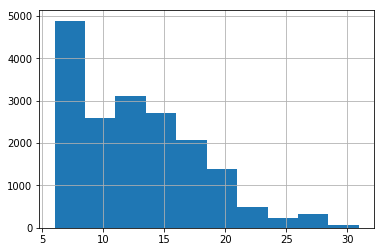

In [62]:
df_managers['int_rate'].hist()

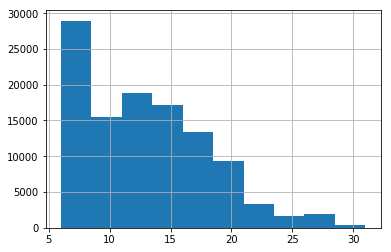

In [63]:
df_nonmanagers['int_rate'].hist()

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [64]:
# Let's look at the issue date
df_nonmanagers['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [65]:
# We're going to convert this data to the universally accepted format
df_nonmanagers['issue_d'] = pd.to_datetime(df_nonmanagers['issue_d'])
df_nonmanagers['issue_d'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [66]:
df_nonmanagers['issue_year'] = df_nonmanagers['issue_d'].dt.year
df_nonmanagers['issue_month'] = df_nonmanagers['issue_d'].dt.month
df_nonmanagers[['issue_year', 'issue_month']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,issue_year,issue_month
0,2018,12
1,2018,12
2,2018,12
3,2018,12
4,2018,12


# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

**- Convert the `term` column from string to integer.**

In [33]:
# Let's take a look at the term column
df['term'].head(10)

0     36 months
1     36 months
2     36 months
3     36 months
4     36 months
5     60 months
6     60 months
7     60 months
8     36 months
9     60 months
Name: term, dtype: object

In [34]:
# Any null values?
df['term'].isnull().sum()

0

In [0]:
# Great, so we just need to strip 'months' and convert to 'int'
def term_int(term):
  return int(term.strip(' months'))

In [36]:
# Now let's apply the function
df['term'] = df['term'].apply(term_int)
df['term'].head(10)

0    36
1    36
2    36
3    36
4    36
5    60
6    60
7    60
8    36
9    60
Name: term, dtype: int64

**- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.**

In [37]:
# Let's look at loan_status
df['loan_status'].tail(25)

128387              Current
128388              Current
128389              Current
128390           Fully Paid
128391              Current
128392              Current
128393              Current
128394    Late (16-30 days)
128395              Current
128396              Current
128397              Current
128398              Current
128399              Current
128400              Current
128401              Current
128402              Current
128403              Current
128404              Current
128405              Current
128406              Current
128407          Charged Off
128408              Current
128409              Current
128410              Current
128411              Current
Name: loan_status, dtype: object

In [38]:
# How many unique values are there in this column?
df['loan_status'].nunique()

7

In [39]:
# Not that many. What are they?
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [40]:
# So we need to isolate Current and Fully Paid

df['loan_status_is_great'] = df['loan_status'].str.contains('Current', 'Fully Paid')
df['loan_status_is_great'].tail(25)

128387     True
128388     True
128389     True
128390    False
128391     True
128392     True
128393     True
128394    False
128395     True
128396     True
128397     True
128398     True
128399     True
128400     True
128401     True
128402     True
128403     True
128404     True
128405     True
128406     True
128407    False
128408     True
128409     True
128410     True
128411     True
Name: loan_status_is_great, dtype: bool

In [0]:
# Let's define the function we'll need
def greatloan(check):
  if check == True:
    return int(1)
  else:
    return int(0)

In [42]:
# Now let's apply it to the column we created
df['loan_status_is_great'] = df['loan_status_is_great'].apply(greatloan)
df['loan_status_is_great'].tail(25)

128387    1
128388    1
128389    1
128390    0
128391    1
128392    1
128393    1
128394    0
128395    1
128396    1
128397    1
128398    1
128399    1
128400    1
128401    1
128402    1
128403    1
128404    1
128405    1
128406    1
128407    0
128408    1
128409    1
128410    1
128411    1
Name: loan_status_is_great, dtype: int64

**- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.**

In [43]:
# Let's look at the last_pymnt_d column
df['last_pymnt_d'].sample(10)

6239      Apr-2019
90670     Apr-2019
67156     Apr-2019
106961    Apr-2019
60376     Apr-2019
127203    Apr-2019
100672    Apr-2019
69576     Apr-2019
75423     Apr-2019
112757    Apr-2019
Name: last_pymnt_d, dtype: object

In [44]:
# Let's convert the dates
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
df['last_pymnt_d'].tail(10)

128402   2019-04-01
128403   2019-04-01
128404   2019-04-01
128405   2019-04-01
128406   2019-04-01
128407   2018-12-01
128408   2019-04-01
128409   2019-04-01
128410   2019-04-01
128411   2019-04-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [45]:
# Now we can create columns for the month and the year
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.month
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year
df[['last_pymnt_d_month', 'last_pymnt_d_year']].tail(10)

,last_pymnt_d_month,last_pymnt_d_year
128402,4.0,2019.0
128403,4.0,2019.0
128404,4.0,2019.0
128405,4.0,2019.0
128406,4.0,2019.0
128407,12.0,2018.0
128408,4.0,2019.0
128409,4.0,2019.0
128410,4.0,2019.0
128411,4.0,2019.0


# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01